In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("C:/Users/usman.bashir/Desktop/Python Prac/Police Data Analysis.csv", parse_dates = ['stop_date'])

In [37]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [38]:
# Remove the column that only contains missing values.
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [39]:
df.drop(columns = ['country_name'], axis = 1, inplace = True)

In [40]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [41]:
# For Speeding , were Men or Women stopped more often? 
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [42]:
df.groupby("driver_gender")['violation'].value_counts()

driver_gender  violation          
F              Speeding               11686
               Moving violation        2142
               Equipment               1396
               Registration/plates      632
               Other                    454
M              Speeding               25517
               Moving violation        9784
               Equipment               5120
               Other                   3129
               Registration/plates     1611
               Seat belt                  3
Name: count, dtype: int64

In [43]:
data1 = df[df['violation'] == "Speeding"]

<Axes: xlabel='driver_gender', ylabel='count'>

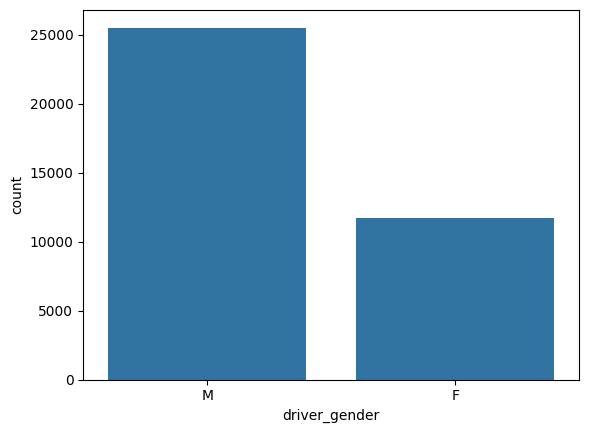

In [44]:
sns.countplot(x = "driver_gender", data  = data1)

In [45]:
# So as we can see for speeding men were stopped more often than women.

In [46]:
# Does gender affect who gets searched during a stop
df.groupby("driver_gender")['search_conducted'].sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

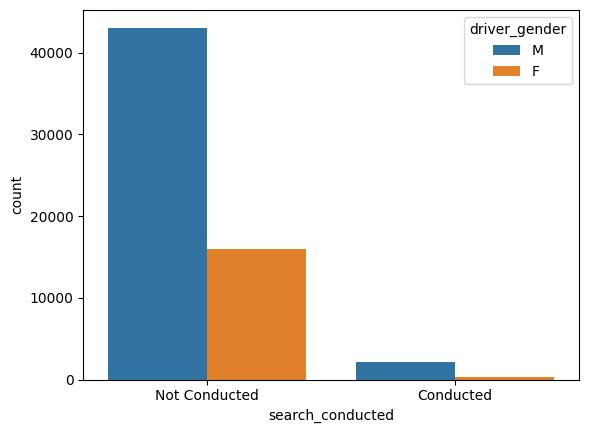

In [47]:
x = sns.countplot(x ="search_conducted", data = df, hue = "driver_gender")
plt.xticks(['False', 'True'], ['Not Conducted','Conducted'])
plt.show()

In [48]:
# How does the frequency of violations vary by race?
df.groupby('driver_race')['violation'].value_counts()

driver_race  violation          
Asian        Speeding                1173
             Moving violation         242
             Equipment                130
             Other                     65
             Registration/plates       29
Black        Speeding                3658
             Moving violation        2076
             Equipment               1262
             Other                    767
             Registration/plates      503
             Seat belt                  1
Hispanic     Speeding                2062
             Moving violation        1543
             Equipment               1069
             Other                    469
             Registration/plates      467
             Seat belt                  1
Other        Speeding                 125
             Moving violation          49
             Other                     21
             Equipment                 15
             Registration/plates        1
White        Speeding               30186
 

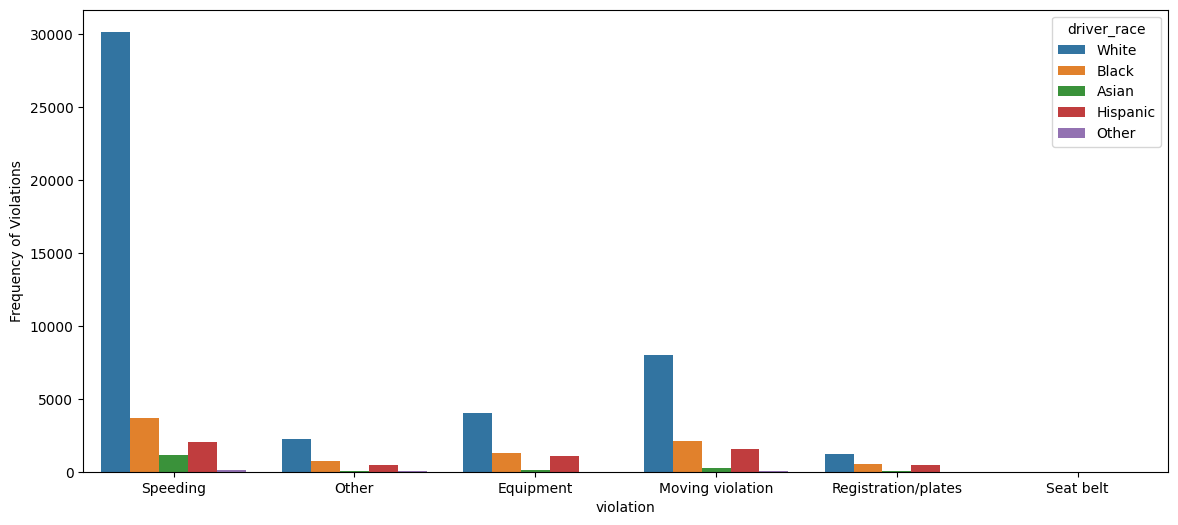

In [49]:
plt.figure(figsize = (14,6))
sns.countplot(x = 'violation', data = df, hue = 'driver_race')
plt.ylabel("Frequency of Violations")
plt.show()

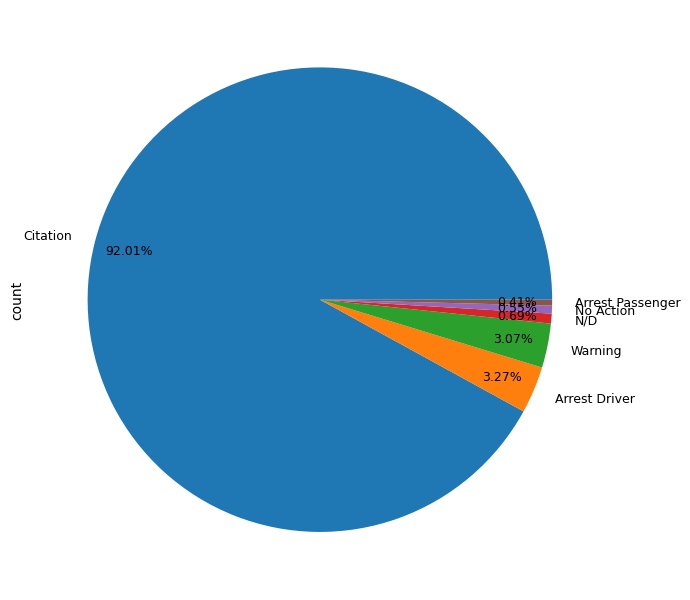

In [50]:
# What is the most common outcome of traffic stops?
plt.figure(figsize = [7,7])
df['stop_outcome'].value_counts().plot(kind = 'pie', autopct = '%2.2f%%',fontsize = 9, pctdistance=0.85)
plt.tight_layout()

In [51]:
# Which day of the week had the highest no. of Violations
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [52]:
import calendar
df['Day'] = df['stop_date'].dt.dayofweek

In [53]:
list = []
for day in df['Day']:
    list.append(calendar.day_name[day])

In [54]:
df['Day_Name'] = list

In [55]:
df.head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Day,Day_Name
0,2005-01-02,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,6,Sunday


In [56]:
grouped_data = df.groupby("Day_Name")['violation'].count().sort_values(ascending = False)

Text(0, 0.5, 'Number of Violations')

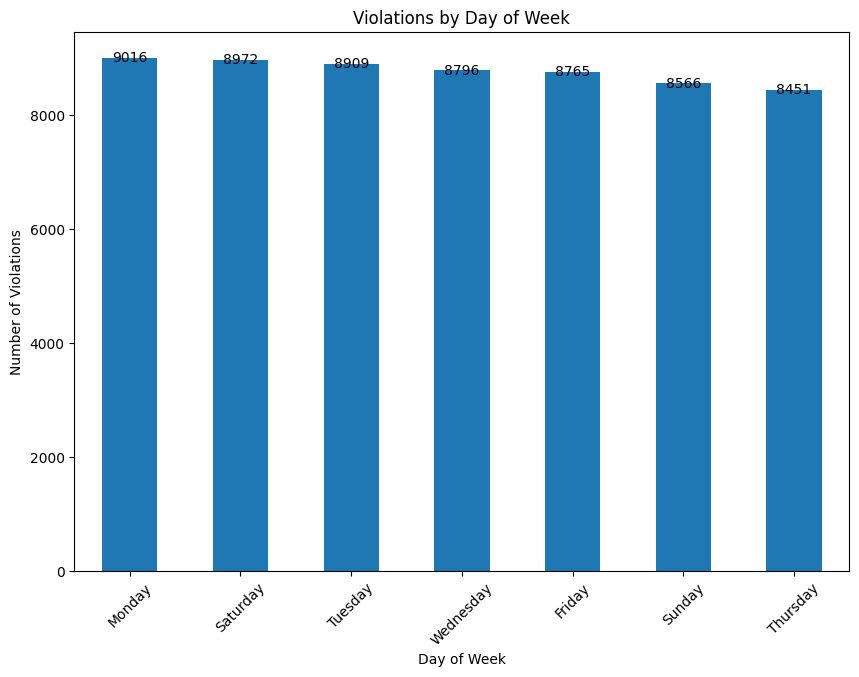

In [57]:
grouped_data.plot(kind  = "bar", title= 'Violations by Day of Week', figsize = (10,7))
for i, v in enumerate(grouped_data):
    plt.text(i, v + 0.1, str(v), ha='center', va = 'center' )
plt.xticks(rotation =45)    
plt.xlabel("Day of Week")
plt.ylabel("Number of Violations")

In [58]:
# What is the trend of traffic stops over time (e.g., by year)?
df.head()
df['Year'] = df['stop_date'].dt.year

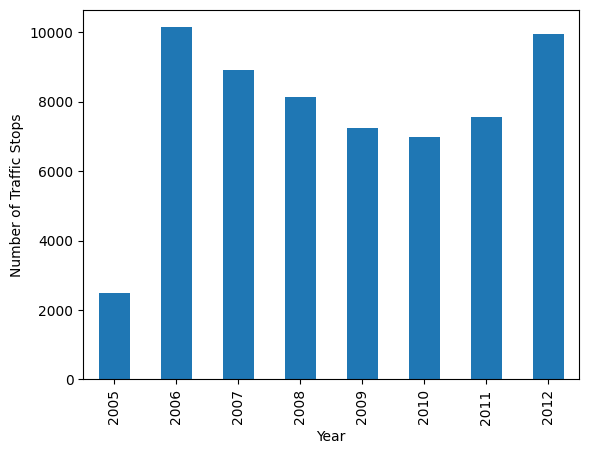

In [59]:
df.groupby(['Year'])['violation'].count().plot(kind = "bar")
plt.ylabel("Number of Traffic Stops")
plt.show()

In [60]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'Day', 'Day_Name', 'Year'],
      dtype='object')

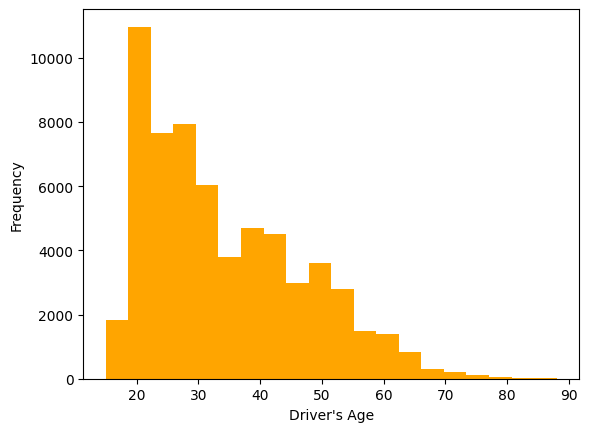

In [72]:
# Are there any demographic trends in the dataset, such as the age distribution of drivers?
plt.hist(x = df['driver_age'], bins =20, color = 'orange',)
plt.ylabel("Frequency")
plt.xlabel("Driver's Age")
plt.show()

In [73]:
# As depicted through the histpgram, the majority of the drivers who commit a violation are from the ages 18-22

In [74]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Day,Day_Name,Year
0,2005-01-02,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,6,Sunday,2005
1,2005-01-18,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,1,Tuesday,2005


In [78]:
# Are certain types of violations more likely to result in an arrest?
df.groupby("is_arrested").get_group(True)["violation"].value_counts().sort_values(ascending = False)

violation
Moving violation       710
Speeding               548
Equipment              470
Registration/plates    276
Other                  256
Name: count, dtype: int64

In [79]:
# As we can see "Moving Violation" results in the greatest number of arrests whereas Violations under the category og "Other" result in the
# least number of arrests.

In [88]:
# What is the relationship between the time of day and the likelihood of a search being conducted during a traffic stop?
list1 = []
for val in df['stop_time']:
    hour = val.split(":")[0]
    list1.append(hour)

In [90]:
df['Hour'] = list1

In [91]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Day,Day_Name,Year,Hour
0,2005-01-02,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,6,Sunday,2005,1
1,2005-01-18,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,1,Tuesday,2005,8
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,6,Sunday,2005,23
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,6,Sunday,2005,17
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,0,Monday,2005,10


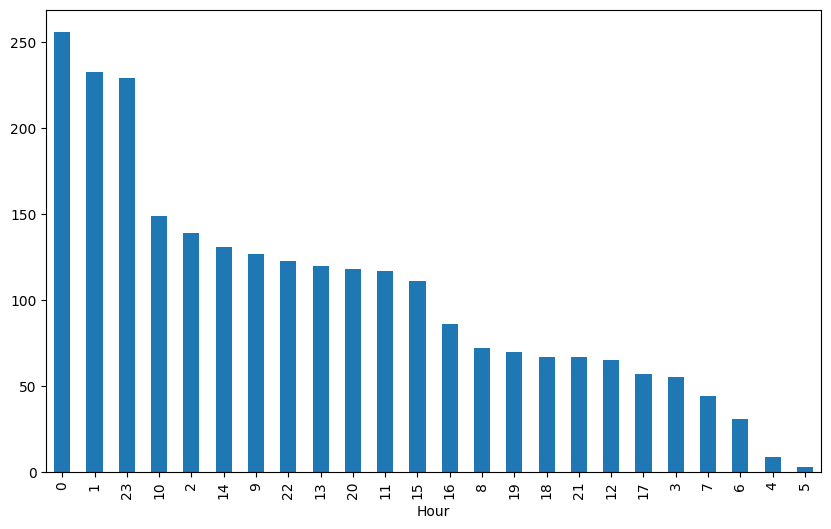

In [157]:
df.groupby('Hour')['search_conducted'].sum().sort_values(ascending =False).plot(kind = "bar", figsize = (10,6))
plt.show()

In [121]:
# As we can see the highest number of violations occur at 12am whereas the least number of violations occur at 5pm.

In [164]:
# What is the most common violation type for each day of the week?
df.groupby('Day_Name')['violation'].value_counts()

Day_Name   violation          
Friday     Speeding               5120
           Moving violation       1832
           Equipment               902
           Other                   581
           Registration/plates     330
Monday     Speeding               5374
           Moving violation       1720
           Equipment               982
           Other                   583
           Registration/plates     357
Saturday   Speeding               5930
           Moving violation       1478
           Equipment               925
           Other                   343
           Registration/plates     293
           Seat belt                 3
Sunday     Speeding               5679
           Moving violation       1457
           Equipment               855
           Other                   294
           Registration/plates     281
Thursday   Speeding               4857
           Moving violation       1800
           Equipment               908
           Other                 

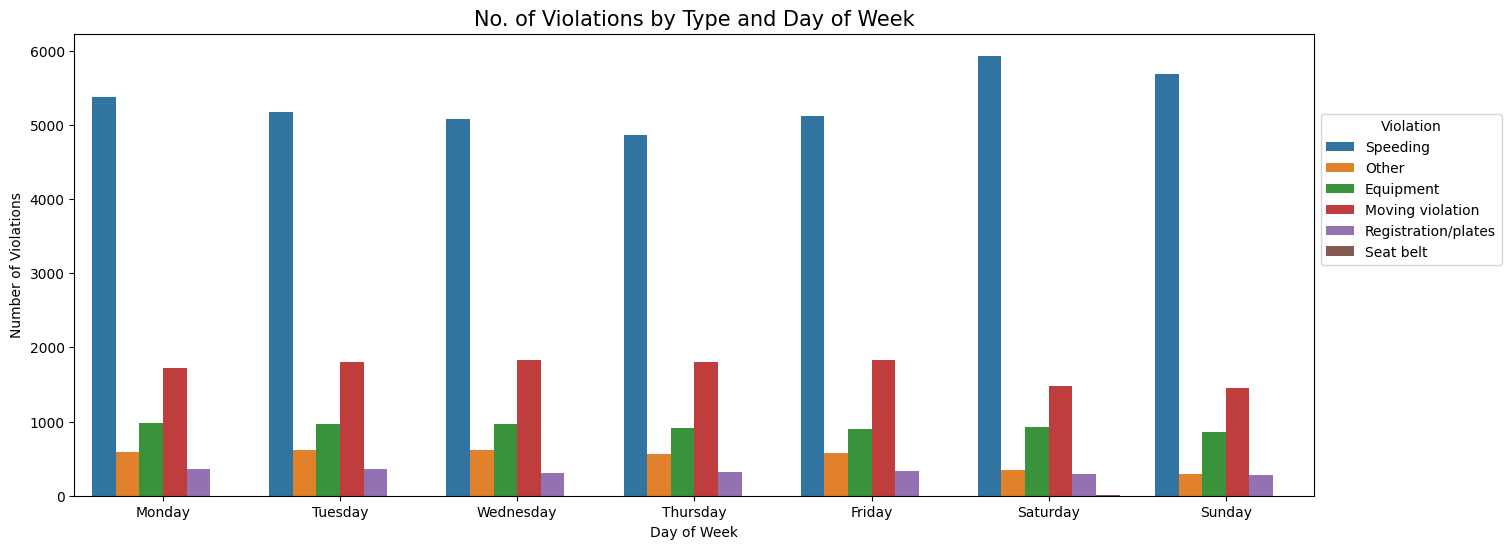

In [190]:
plt.figure(figsize = (16,6))
sns.countplot(x = "Day_Name", data =df, order = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], hue = "violation")
plt.legend(title = "Violation", loc = [1.005,0.5])
plt.ylabel("Number of Violations")
plt.xlabel("Day of Week")
plt.title("No. of Violations by Type and Day of Week",fontsize =15)
plt.show()